# **Modules**

In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D

# **Load dataset**

In [ ]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
!unzip  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip 

Archive:  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip
fe829d254cd85cf845897b9c1f631a7751c6e1c4
replace DL-OCR-Arabic-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DL-OCR-Arabic-main/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DL-OCR-Arabic-main/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace DL-OCR-Arabic-main/datatset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DL-OCR-Arabic-main/datatset/abed/abed001.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DL-OCR-Arabic-main/datatset/abed/abed002.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Exemples du dataset

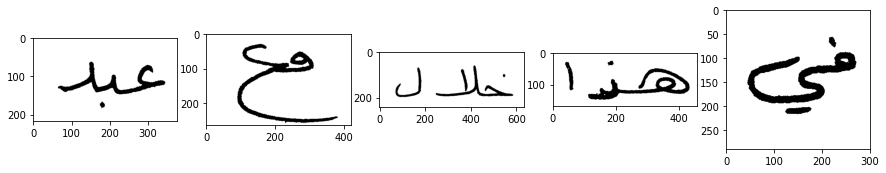

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

img =  load_img('/content/DL-OCR-Arabic-main/datatset/abed/abed001.tif')
img2 =  load_img('/content/DL-OCR-Arabic-main/datatset/ma/ma006.tif')
img3 =  load_img('/content/DL-OCR-Arabic-main/datatset/khelal/khelal001.tif')
img4 =  load_img('/content/DL-OCR-Arabic-main/datatset/hatha/hatha006.tif')
img5 = load_img('/content/DL-OCR-Arabic-main/datatset/in/in021.tif')
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)

# Building dataset

In [ ]:
dataset_images  = []
dataset_labels = []
directory ='/content/DL-OCR-Arabic-main/datatset/abed'
rootdir = '/content/DL-OCR-Arabic-main/datatset'
shape = (200,200)
for subdir, dirs, files in os.walk(rootdir):
 
  for file in files:
    if file.split('.')[1] == 'tif':

      img = cv2.imread(os.path.join(subdir, file))
      img = cv2.resize(img,shape)
      dataset_images.append(img)
      dataset_labels.append(os.path.basename(subdir))


df = pd.DataFrame()
df['images'] = dataset_images
df['labels'] = dataset_labels
labels = dataset_labels
train_labels = pd.get_dummies(labels ).values
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print(df)


                                                 images labels
0     [[[255, 255, 255], [255, 255, 255], [255, 255,...     qd
1     [[[255, 255, 255], [255, 255, 255], [255, 255,...     qd
2     [[[255, 255, 255], [255, 255, 255], [255, 255,...     qd
3     [[[255, 255, 255], [255, 255, 255], [255, 255,...     qd
4     [[[255, 255, 255], [255, 255, 255], [255, 255,...     qd
...                                                 ...    ...
1903  [[[255, 255, 255], [255, 255, 255], [255, 255,...     en
1904  [[[255, 255, 255], [255, 255, 255], [255, 255,...     en
1905  [[[255, 255, 255], [255, 255, 255], [255, 255,...     en
1906  [[[255, 255, 255], [255, 255, 255], [255, 255,...     en
1907  [[[255, 255, 255], [255, 255, 255], [255, 255,...     en

[1908 rows x 2 columns]


In [ ]:
df_in = df.loc[df['labels'] == 'fi']['images']
df_in.shape

(69,)

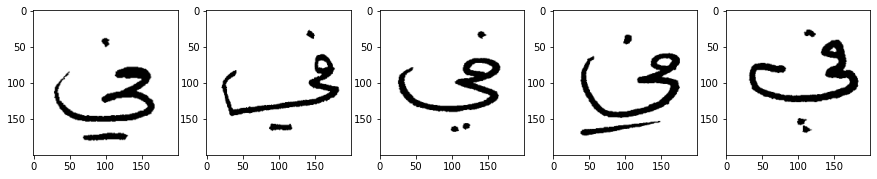

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
for i in range(10,15):
  
  ax[i-10].imshow(df_in.iloc[i])


In [ ]:


unique_labels = list(OrderedDict.fromkeys(labels))
df_labels = pd.DataFrame()
df_labels['labels'] = df['labels']
labelencoder = LabelEncoder()
df_labels['labels_cat'] = labelencoder.fit_transform(df_labels['labels'] )
new_y = np.array(df_labels['labels_cat'] )

unique_labels_num = np.array(df_labels['labels_cat'].drop_duplicates())
print(df_labels)
print(new_y)
print(unique_labels_num)
print(unique_labels)

dict_lab =dict()
for i in range(0,len(unique_labels_num)):
  dict_lab[unique_labels_num[i]] = unique_labels[i]

print(dict_lab)

     labels  labels_cat
0        qd          25
1        qd          25
2        qd          25
3        qd          25
4        qd          25
...     ...         ...
1903     en          10
1904     en          10
1905     en          10
1906     en          10
1907     en          10

[1908 rows x 2 columns]
[25 25 25 ... 10 10 10]
[25 16 22  1 20  9  5  2  4 23 14 26 11  7  0 15  8 12 17 24 21  6 27 18
 13  3 19 10]
['qd', 'hya', 'mn', 'ala', 'ma', 'ela', 'alty', 'alaam', 'althy', 'mohd', 'hnak', 'tm', 'fi', 'an', 'abed', 'hwa', 'aw', 'hatha', 'kan', 'qabel', 'maa', 'alyom', 'ykon', 'khelal', 'hathih', 'allah', 'kma', 'en']
{25: 'qd', 16: 'hya', 22: 'mn', 1: 'ala', 20: 'ma', 9: 'ela', 5: 'alty', 2: 'alaam', 4: 'althy', 23: 'mohd', 14: 'hnak', 26: 'tm', 11: 'fi', 7: 'an', 0: 'abed', 15: 'hwa', 8: 'aw', 12: 'hatha', 17: 'kan', 24: 'qabel', 21: 'maa', 6: 'alyom', 27: 'ykon', 18: 'khelal', 13: 'hathih', 3: 'allah', 19: 'kma', 10: 'en'}


**Class distributions**

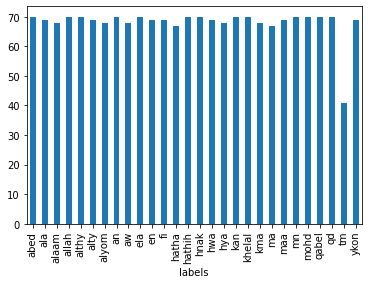

In [ ]:
df2 = df.groupby(['labels'])['labels'].count().plot(kind='bar')

In [ ]:
dict_lab[22]

'mn'

qd


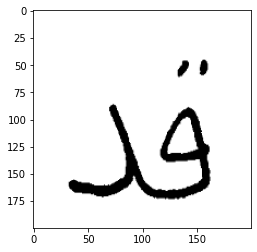

In [ ]:
plt.imshow(dataset_images[0])
print(dataset_labels[0])


In [ ]:
df['labels']

0       qd
1       qd
2       qd
3       qd
4       qd
        ..
1903    en
1904    en
1905    en
1906    en
1907    en
Name: labels, Length: 1908, dtype: object

**Reshape data for layer input**

In [ ]:
print(dataset_images[80].shape)

(200, 200, 3)


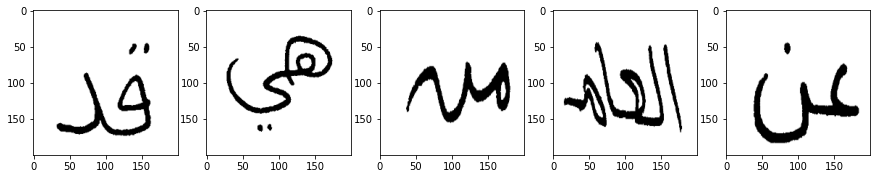

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
ax[0].imshow(dataset_images[0])
ax[1].imshow(dataset_images[70])
ax[2].imshow(dataset_images[170])
ax[3].imshow(dataset_images[500])
ax[4].imshow(dataset_images[900])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, train_labels,test_size=0.2, random_state=42)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


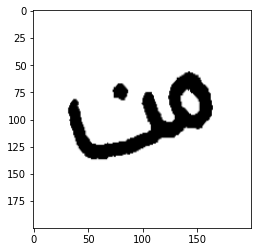

In [ ]:
plt.imshow(X_train[0])
print(y_train[0])


label to text 

# **Building model**

# **MODEL 2 NO DATAGE**

# Preprocess to 1canal img

# **MODEL 1 NO DATAGN**

In [ ]:
X_train.shape

(1526, 200, 200, 3)

In [ ]:
y_train.shape

(1526,)

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,3), strides=(4,4), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))


model.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.shape

(1526,)

18


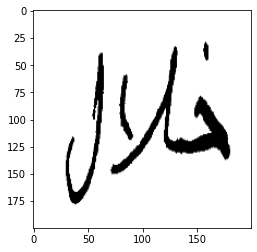

In [ ]:

plt.imshow(X_test[10])
print(y_test[10])


In [ ]:
y_train.shape

(1526,)

Reshape labels

In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 16s 488ms/step - loss: 14.3698 - accuracy: 0.0858 - val_loss: 16.6644 - val_accuracy: 0.0393
Epoch 2/20
31/31 [==============================] - 17s 544ms/step - loss: 12.2632 - accuracy: 0.1592 - val_loss: 12.7635 - val_accuracy: 0.0916
Epoch 3/20
31/31 [==============================] - 16s 514ms/step - loss: 10.6110 - accuracy: 0.2366 - val_loss: 11.0274 - val_accuracy: 0.1204
Epoch 4/20
31/31 [==============================] - 15s 490ms/step - loss: 8.8790 - accuracy: 0.3453 - val_loss: 8.5673 - val_accuracy: 0.2906
Epoch 5/20
31/31 [==============================] - 17s 536ms/step - loss: 7.2487 - accuracy: 0.4830 - val_loss: 7.1892 - val_accuracy: 0.3796
Epoch 6/20
31/31 [==============================] - 15s 480ms/step - loss: 5.8149 - accuracy: 0.6304 - val_loss: 6.1093 - val_accuracy: 0.4188
Epoch 7/20
31/31 [==============================] - 16s 519ms/step - loss: 4.7279 - accuracy: 0.7313 - val_loss: 4.7696 - val_accuracy: 

In [ ]:
# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_19 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 95)        76095     
                                                                 
 batch_normalization_20 (Bat  (None, 24, 24, 95)       380       
 chNormalization)                                                
                                                      

In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 83ms/step


In [ ]:
y_true = y_test

In [ ]:
X_test.shape

(382, 200, 200, 3)

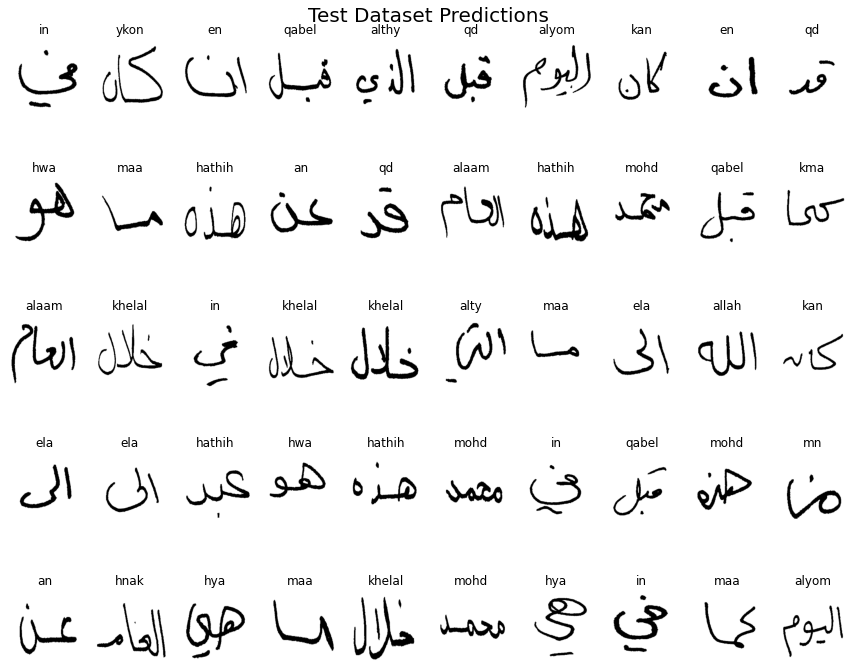

In [ ]:
import random
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:

y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm

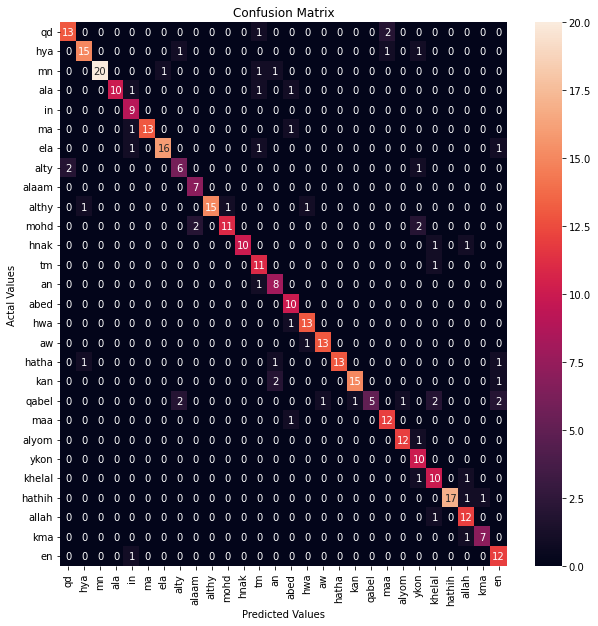

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred)

0.5376794005682326

In [ ]:
from sklearn.metrics import cohen_kappa_score
#good score is >8 
cohen_kappa_score(y_testm, y_predm)

0.8450326318261724

In [ ]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
#good roc auc >8
roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

0.9936623792784398

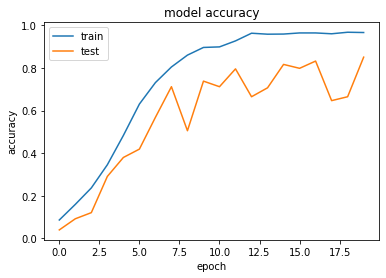

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

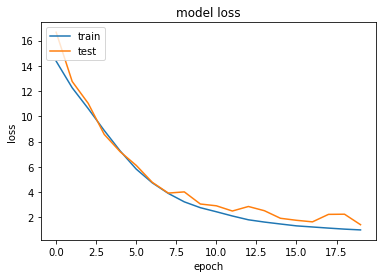

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

In [ ]:
model.save('./models/nodataaug_model.h5') 

In [ ]:
!mv /content/models/nodataaug_model.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# **Data generation**

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,3), strides=(4,4), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))


model.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1526, 200, 200, 3)
(382, 200, 200, 3)


In [ ]:
 #loading training data

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)


validation_datagen =  ImageDataGenerator(
   
        rescale=1./255)


batch_size = 48
train_generator = train_datagen.flow(
    X_train,y_train, 
    batch_size=batch_size,
    
    shuffle=True)

validation_generator = validation_datagen.flow( 
      X_test,y_test, 
    
   
    batch_size=batch_size,
    
     shuffle=False)

In [ ]:
dict_lab

{25: 'qd',
 15: 'hya',
 22: 'mn',
 1: 'ala',
 16: 'in',
 20: 'ma',
 9: 'ela',
 5: 'alty',
 2: 'alaam',
 4: 'althy',
 23: 'mohd',
 13: 'hnak',
 26: 'tm',
 7: 'an',
 0: 'abed',
 14: 'hwa',
 8: 'aw',
 11: 'hatha',
 17: 'kan',
 24: 'qabel',
 21: 'maa',
 6: 'alyom',
 27: 'ykon',
 18: 'khelal',
 12: 'hathih',
 3: 'allah',
 19: 'kma',
 10: 'en'}

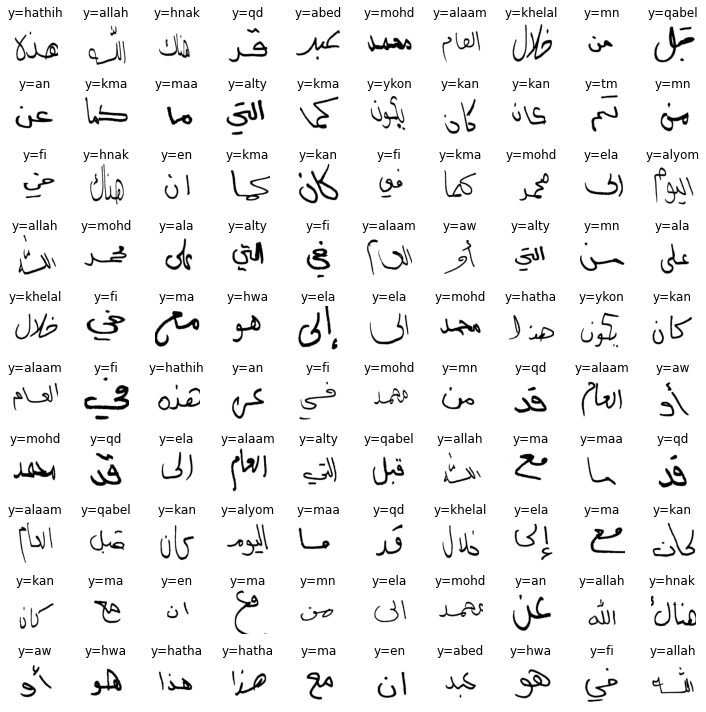

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    for x,y in train_generator:
        plt.imshow(x[0])
        
        #plt.title('y={}'.format(df_labels.loc[df_labels['labels_cat']  == y[0]].drop_duplicates()))
        #print(y[0])
        idx=np.where(y[0] == 1)
        #print(idx[0][0])
        plt.title('y={}'.format(dict_lab[idx[0][0]]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

'Further, I think it's worth clarifying the meaning of "augmentation" in this context: basically we are augmenting the images when we use ImageDataGenerator and enabling its augmentation capabilities. But the word "augmentation" here does not mean, say, if we have 100 original training images we end up having 1000 images per epoch after augmentation (i.e. the number of training images does not increase per epoch). Instead, it means we use a different transformation of each image in each epoch; hence, if we train our model for, say, 5 epochs, we have used 5 different versions of each original image in training (or 100 * 5 = 500 different images in the whole training, instead of using just the 100 original images in the whole training). To put it differently, the total number of unique images increases in the whole training from start to finish, and not per epoch.'

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=100,
                    validation_data=(validation_generator))

Epoch 1/100
31/31 [==============================] - 22s 674ms/step - loss: 14.3669 - accuracy: 0.0853 - val_loss: 13.0866 - val_accuracy: 0.0340
Epoch 2/100
31/31 [==============================] - 22s 711ms/step - loss: 12.2947 - accuracy: 0.1380 - val_loss: 12.2044 - val_accuracy: 0.0340
Epoch 3/100
31/31 [==============================] - 21s 666ms/step - loss: 10.6048 - accuracy: 0.2145 - val_loss: 11.7314 - val_accuracy: 0.0340
Epoch 4/100
31/31 [==============================] - 21s 670ms/step - loss: 8.9197 - accuracy: 0.3099 - val_loss: 11.3482 - val_accuracy: 0.0340
Epoch 5/100
31/31 [==============================] - 21s 659ms/step - loss: 7.3563 - accuracy: 0.4296 - val_loss: 13.2339 - val_accuracy: 0.0340
Epoch 6/100
31/31 [==============================] - 22s 691ms/step - loss: 6.0149 - accuracy: 0.5250 - val_loss: 12.3908 - val_accuracy: 0.0393
Epoch 7/100
31/31 [==============================] - 21s 665ms/step - loss: 4.9067 - accuracy: 0.6225 - val_loss: 14.2431 - val

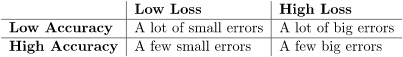

In [ ]:
redim_test = []
for x in X_test:
  redim_test.append( x/ 255)

redim_test = np.array(redim_test)

In [ ]:
y_pred_gen = model.predict(redim_test)

12/12 [==============================] - 1s 81ms/step


In [ ]:
model.save('./models/dataaug_model.h5') 
!mv /content/models/dataaug_model.h5 /content/drive/MyDrive/OCR-DATASET-PROF

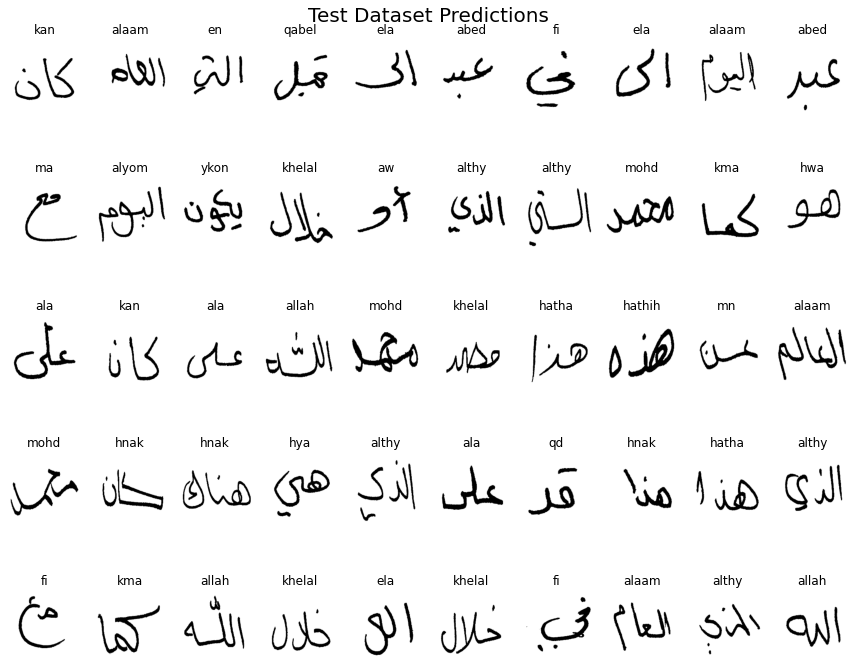

In [ ]:
import random
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,360)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred_gen[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

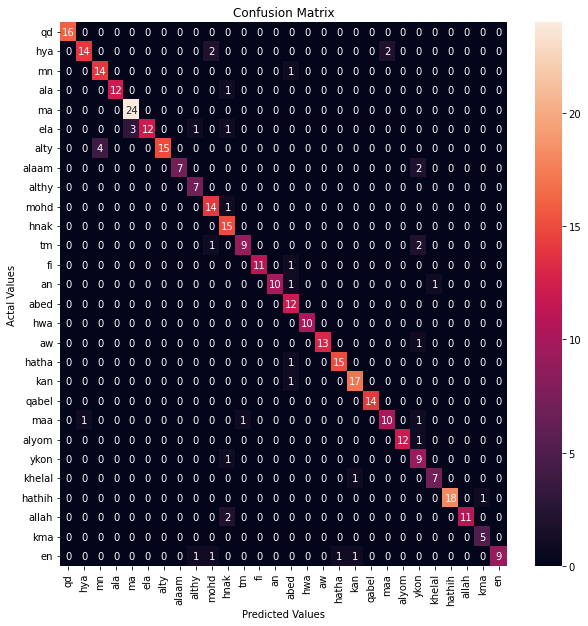

In [ ]:

y_predm=np.argmax(y_pred_gen, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score
#good score is >8 
cohen_kappa_score(y_testm, y_predm)


0.8910936252708405

In [ ]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred_gen)


0.3864831323316526

In [ ]:

from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
#good roc auc >8
roc_auc_score(y_test, y_pred_gen, average="weighted", multi_class="ovr")


0.99650503144985

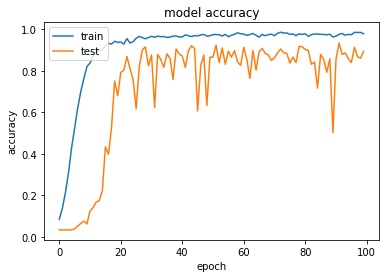

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


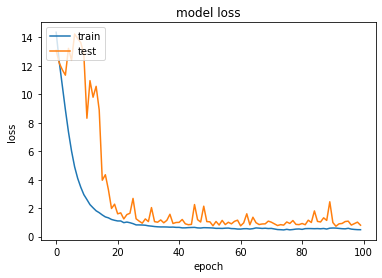

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()